<a href="https://colab.research.google.com/github/doommodery/neural/blob/main/%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# –ó–∞–¥–∞–Ω–∏–µ ‚Ññ1. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≥–ª—É–±–æ–∫–æ–π —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –ø—Ä–µ–¥–º–µ—Ç–æ–≤ –æ–¥–µ–∂–¥—ã –Ω–∞ –ø—Ä–∏–º–µ—Ä–µ –¥–∞—Ç–∞—Å–µ—Ç–∞ Fashion MNIST


**–í –∫–∞—á–µ—Å—Ç–≤–µ –∏–Ω—Ç–µ—Ä—Ñ–µ–π—Å–∞ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –º–æ–¥–µ–ª—è–º–∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[–¢–µ—Ö–Ω–∏—á–µ—Å–∫–∞—è –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è –ø–æ –¥–∞—Ç–∞—Å–µ—Ç—É](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏

In [188]:
from keras.datasets import fashion_mnist # –∏–º–ø–æ—Ä—Ç –∏—Å—Ö–æ–¥–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. –†–∞–∑–¥–µ–ª—è–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫—É

In [189]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –≤—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [190]:
from tensorflow import keras

train_X = trainX / 255
test_X = testX / 255

train_Y = keras.utils.to_categorical(trainy, 10) # –ü–µ—Ä–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ OneHot Encoding
test_Y = keras.utils.to_categorical(testy, 10) # –ü–µ—Ä–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ OneHot Encoding

train_X = np.expand_dims(train_X, -1)
test_X = np.expand_dims(test_X, -1)

print(train_X.shape)
print(test_X.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [191]:
print(train_Y)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 1.3. –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞

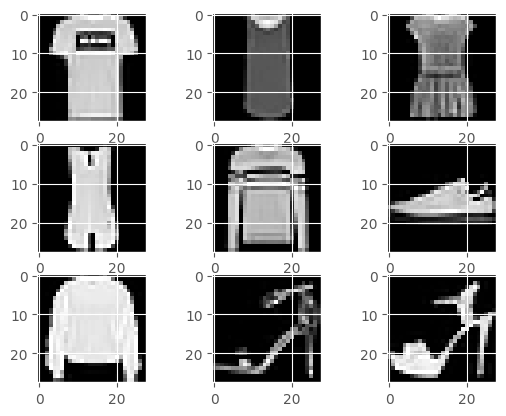

In [192]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. –°–æ–∑–¥–∞—ë–º –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –∏ –∫–æ–º–ø–∏–ª–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å

In [193]:
# –í–∞—à –∫–æ–¥
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_69 (Conv2D)                   ‚îÇ (None, 28, 28, 32)          ‚îÇ             320 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_57 (MaxPooling2D)      ‚îÇ (None, 14, 14, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_70 (Conv2D)                   ‚îÇ (None, 14, 14, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_58 (MaxPooling2D)      ‚îÇ (None, 7, 7, 64)            ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_23 (Flatten)                 ‚îÇ (None, 3136)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_64 (Dense)                     ‚îÇ (None, 128)                 ‚îÇ         401,536 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_65 (Dense)                     ‚îÇ (None, 10)                  ‚îÇ           1,290 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

## 1.5. –û–±—É—á–∞–µ–º –º–æ–¥–µ–ª—å

In [194]:
# –í–∞—à –∫–æ–¥
EPOCH = 3

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(train_X, train_Y, batch_size=50, epochs=EPOCH, validation_split=0.2)

Epoch 1/3
960/960 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 5ms/step - accuracy: 0.7777 - loss: 0.6240 - val_accuracy: 0.8850 - val_loss: 0.3205
Epoch 2/3
960/960 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 4ms/step - accuracy: 0.8888 - loss: 0.3048 - val_accuracy: 0.8904 - val_loss: 0.3057
Epoch 3/3
960/960 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 4ms/step - accuracy: 0.9096 - loss: 0.2463 - val_accuracy: 0.9089 - val_loss: 0.2509


## 1.6. –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å. –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ (–≥—Ä–∞—Ñ–∏–∫–∏) –æ–±—É—á–µ–Ω–∏—è

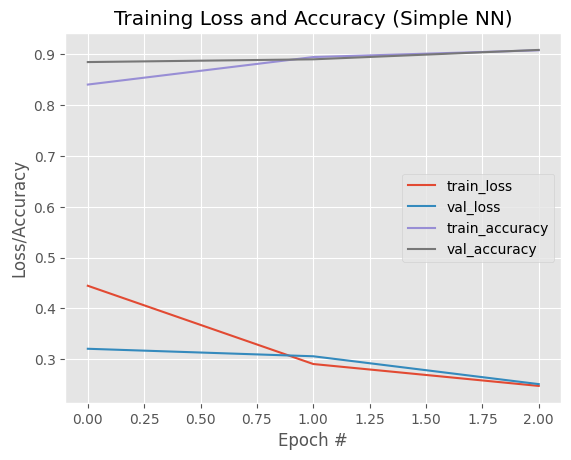

In [195]:
# –í–∞—à –∫–æ–¥
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. –ó–∞–≥—Ä—É–∂–∞–µ–º —Å–≤–æ–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è. –° –ø–æ–º–æ—â—å—é —Ñ—É–Ω–∫—Ü–∏–∏ predict() –ø–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏



> –¢—Ä–µ–±—É–µ—Ç—Å—è –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–∏–Ω–∏–º—É–º –ø–æ 5 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º, –∫–∞–∂–¥–æ–µ –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫ —Ä–∞–∑–Ω–æ–º—É –∫–ª–∞—Å—Å—É. –ù–µ –∑–∞–±—É–¥—å—Ç–µ –¥–æ–±–∞–≤–∏—Ç—å –º–µ—Ç–∫–∏ –∫ –∫–∞–∂–¥–æ–º—É –∫–ª–∞—Å—Å—É (–¥–ª—è —ç—Ç–æ–≥–æ –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ —Å–æ–∑–¥–∞—Ç—å —Å–ø–∏—Å–æ–∫ —Å—Ç—Ä–æ–∫, –∫–∞–∂–¥–∞—è –∏–∑ –∫–æ—Ç–æ—Ä—ã—Ö –±—É–¥–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å—É —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–º –∏–Ω–¥–µ–∫—Å–æ–º —Å–º. [—Ç–µ—Ö.–¥–æ–∫.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). –ü—Ä–æ—Ü–µ–Ω—Ç —É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç–∏ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –≤ —Å–≤–æ—ë–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–∏ –≤—ã–≤–æ–¥–∏—Ç—å –æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ.



In [196]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import pickle

model.save('model_fashion.keras')

labels = LabelBinarizer()
labels.fit_transform(train_Y)

with open('labels_fashion', 'wb') as f:
  f.write(pickle.dumps(labels))

print(labels.classes_)

[0 1 2 3 4 5 6 7 8 9]


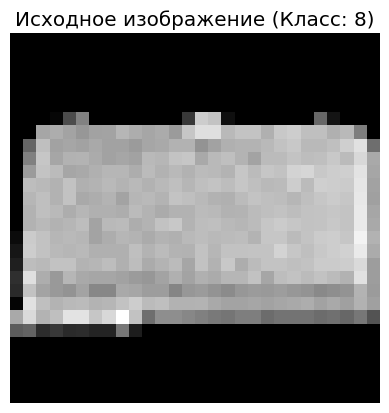

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 384ms/step

üîç **–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:**
----------------------------------------
–ö–ª–∞—Å—Å          –ù–∞–∑–≤–∞–Ω–∏–µ            –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å
----------------------------------------
0              0                   0.00017
1              1                   0.00001
2              2                   0.00008
3              3                   0.00002
4              4                   0.00001
5              5                   0.00000
6              6                   0.00009
7              7                   0.00022
8              8                   0.99932
9              9                   0.00008
----------------------------------------
üéØ **–õ—É—á—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑:** 8 (99.93%)


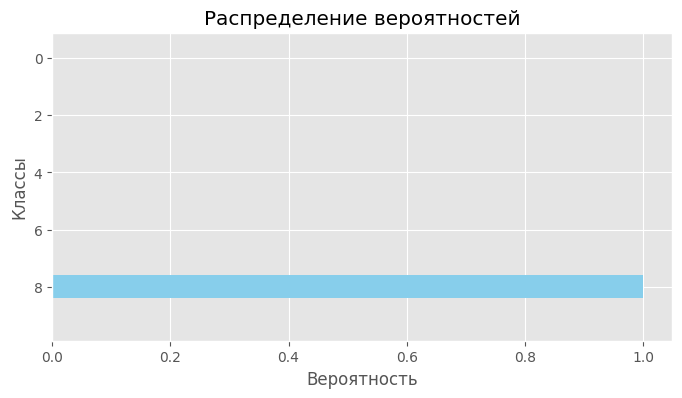

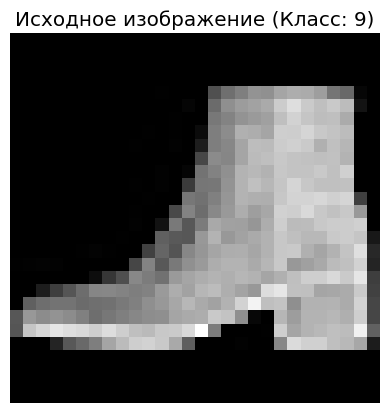

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 410ms/step

üîç **–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:**
----------------------------------------
–ö–ª–∞—Å—Å          –ù–∞–∑–≤–∞–Ω–∏–µ            –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å
----------------------------------------
0              0                   0.00000
1              1                   0.00000
2              2                   0.00000
3              3                   0.00000
4              4                   0.00000
5              5                   0.00002
6              6                   0.00000
7              7                   0.00000
8              8                   0.00000
9              9                   0.99997
----------------------------------------
üéØ **–õ—É—á—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑:** 9 (100.00%)


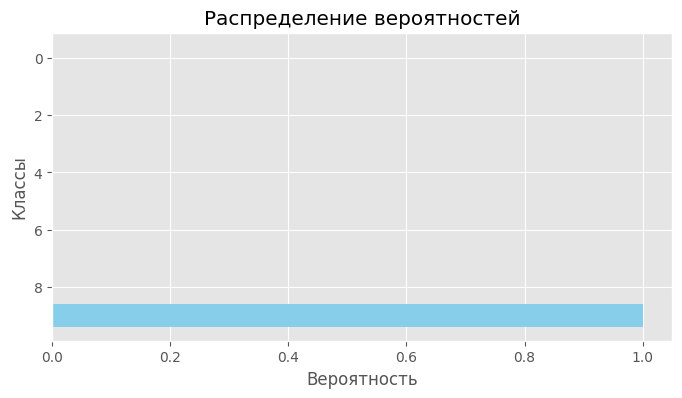

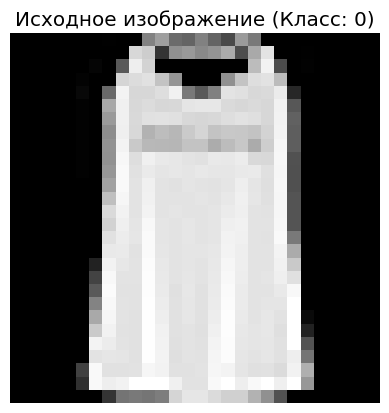

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 252ms/step

üîç **–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:**
----------------------------------------
–ö–ª–∞—Å—Å          –ù–∞–∑–≤–∞–Ω–∏–µ            –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å
----------------------------------------
0              0                   0.31473
1              1                   0.03120
2              2                   0.00712
3              3                   0.06079
4              4                   0.01041
5              5                   0.00000
6              6                   0.57487
7              7                   0.00001
8              8                   0.00084
9              9                   0.00002
----------------------------------------
üéØ **–õ—É—á—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑:** 6 (57.49%)


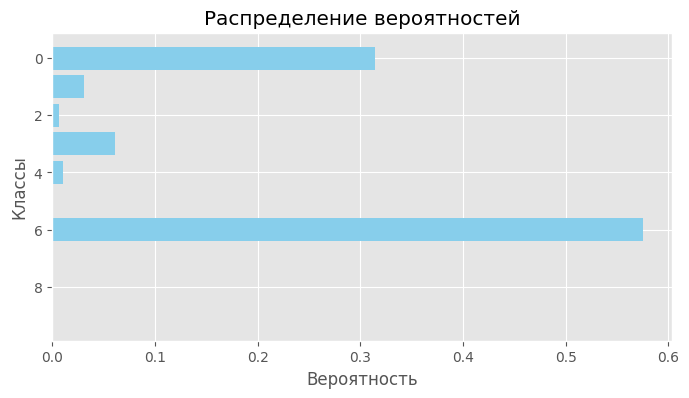

In [197]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.models import load_model

def predict_fashion(image, model_path='model_fashion.keras', labels_path='labels_fashion'):
    model = load_model(model_path)
    lb = pickle.loads(open(labels_path, 'rb').read())  # –ó–∞–≥—Ä—É–∂–∞–µ–º –ª–µ–π–±–ª—ã –∫–ª–∞—Å—Å–æ–≤

    img = image.reshape(-1, 28, 28, 1)  # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –Ω—É–∂–Ω–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É
    preds = model.predict(img)[0]  # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è

    class_names = lb.classes_ if hasattr(lb, "classes_") else [str(i) for i in range(len(preds))]  # –ù–∞–∑–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤

    # –í—ã–≤–æ–¥–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –≤ —É–¥–æ–±–æ—á–∏—Ç–∞–µ–º–æ–º –≤–∏–¥–µ
    print("\nüîç **–†–µ–∑—É–ª—å—Ç–∞—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:**")
    print("-" * 40)
    print(f"{'–ö–ª–∞—Å—Å':<15}{'–ù–∞–∑–≤–∞–Ω–∏–µ':<20}{'–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å'}")
    print("-" * 40)

    for i in range(len(preds)):
        print(f"{i:<15}{class_names[i]:<20}{preds[i]:.5f}")

    best_idx = preds.argmax()
    print("-" * 40)
    print(f"üéØ **–õ—É—á—à–∏–π –ø—Ä–æ–≥–Ω–æ–∑:** {class_names[best_idx]} ({preds[best_idx]:.2%})")

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    plt.figure(figsize=(8, 4))
    plt.barh(class_names, preds, color='skyblue')
    plt.xlabel("–í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å")
    plt.ylabel("–ö–ª–∞—Å—Å—ã")
    plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π")
    plt.gca().invert_yaxis()
    plt.show()

# --- –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ ---
num = np.random.randint(0, 9999, size=3)  # –¢–µ—Å—Ç–∏—Ä—É–µ–º 3 —Å–ª—É—á–∞–π–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞
for i in range(len(num)):
    plt.imshow(test_X[num[i]], cmap='gray')
    plt.axis('off')
    plt.title(f'–ò—Å—Ö–æ–¥–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (–ö–ª–∞—Å—Å: {test_Y[num[i]].argmax()})')
    plt.show()

    predict_fashion(test_X[num[i]])  # –í—ã–∑—ã–≤–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ



# –ó–∞–¥–∞–Ω–∏–µ ‚Ññ2. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≥–ª—É–±–æ–∫–æ–π —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –ø–æ —Å–≤–æ–µ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É


## 2.1.  –ò—Å–ø–æ–ª—å–∑—É—è –¥–∞—Ç–∞—Å–µ—Ç, —Å–æ–±—Ä–∞–Ω–Ω—ã–π –¥–ª—è –ø—Ä–µ–¥—ã–¥—É—â–µ–π —Ä–∞–±–æ—Ç—ã, —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–π—Ç–µ –∏ –æ–±—É—á–∏—Ç–µ **—Å–≤–æ—é** –º–æ–¥–µ–ª—å –≥–ª—É–±–æ–∫–æ–π  **—Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π** –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π







In [198]:
# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º LabelBinarizer –¥–ª—è –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –º–µ—Ç–æ–∫ –≤ –≤–µ–∫—Ç–æ—Ä—ã
# (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–∫–æ—à–∫–∞" -> [1, 0, 0], "—Å–æ–±–∞–∫–∞" -> [0, 1, 0], "–ø–∞–Ω–¥–∞" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º train_test_split –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
from sklearn.model_selection import train_test_split

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º classification_report –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
from sklearn.metrics import classification_report

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º Sequential –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏
from keras.models import Sequential

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º Dense –¥–ª—è —Å–æ–∑–¥–∞–Ω–∏—è –ø–ª–æ—Ç–Ω—ã—Ö —Å–ª–æ–µ–≤ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏
from keras.layers import Dense

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º SGD –∏ Adam –¥–ª—è –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏ –æ–±—É—á–µ–Ω–∏—è –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏
from keras.optimizers import SGD, Adam

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º paths –∏–∑ imutils –¥–ª—è —É–¥–æ–±–Ω–æ–π —Ä–∞–±–æ—Ç—ã —Å –ø—É—Ç—è–º–∏ –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
from imutils import paths

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º pyplot –∏–∑ matplotlib –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
import matplotlib.pyplot as plt

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º numpy –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –º–∞—Å—Å–∏–≤–∞–º–∏ –¥–∞–Ω–Ω—ã—Ö
import numpy as np

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º random –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Å–ª—É—á–∞–π–Ω—ã—Ö —á–∏—Å–µ–ª
import random

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º pickle –¥–ª—è —Å–µ—Ä–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –∏ –¥–µ—Å–µ—Ä–∏–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö
import pickle

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º cv2 –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
import cv2

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º os –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å —Ñ–∞–π–ª–æ–≤–æ–π —Å–∏—Å—Ç–µ–º–æ–π
import os

# –ò–º–ø–æ—Ä—Ç–∏—Ä—É–µ–º cv2_imshow –∏–∑ google.colab.patches –¥–ª—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ Colab
from google.colab.patches import cv2_imshow

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
import os
import zipfile
import random
from imutils import paths

# –ü—É—Ç—å –∫ ZIP-–∞—Ä—Ö–∏–≤—É
zip_path = '/content/drive/MyDrive/animals.zip'

# –í—Ä–µ–º–µ–Ω–Ω–∞—è –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏—è –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è —Ñ–∞–π–ª–æ–≤
extract_path = '/content/animals_extracted'

# –°–æ–∑–¥–∞–µ–º –≤—Ä–µ–º–µ–Ω–Ω—ã–π –∫–∞—Ç–∞–ª–æ–≥, –µ—Å–ª–∏ –æ–Ω –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç
os.makedirs(extract_path, exist_ok=True)

# –°–ª–æ–≤–∞—Ä—å –¥–ª—è –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–Ω–∏—è –ø–∞–ø–æ–∫
translate = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}

# –û—Ç–∫—Ä—ã–≤–∞–µ–º ZIP-–∞—Ä—Ö–∏–≤
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Ñ–∞–π–ª–æ–≤ –≤ –∞—Ä—Ö–∏–≤–µ
    file_list = zip_ref.namelist()

    # –§–∏–ª—å—Ç—Ä—É–µ–º —Ñ–∞–π–ª—ã, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –ø–∞–ø–∫–µ raw-img
    raw_img_files = [f for f in file_list if f.startswith('raw-img/') and not f.endswith('/')]

    # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∫–∞–∂–¥—ã–π —Ñ–∞–π–ª
    for file in raw_img_files:
        # –ò–∑–≤–ª–µ–∫–∞–µ–º –∏–º—è –ø–∞–ø–∫–∏ (–∂–∏–≤–æ—Ç–Ω–æ–≥–æ) –∏–∑ –ø—É—Ç–∏
        folder_name = file.split('/')[1]  # –ù–∞–ø—Ä–∏–º–µ—Ä, "cane", "gatto" –∏ —Ç.–¥.

        # –ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º –ø–∞–ø–∫—É, –µ—Å–ª–∏ —ç—Ç–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ
        if folder_name in translate:
            new_folder_name = translate[folder_name]
        else:
            new_folder_name = folder_name  # –ï—Å–ª–∏ –ø–∞–ø–∫–∞ –Ω–µ –≤ —Å–ª–æ–≤–∞—Ä–µ, –æ—Å—Ç–∞–≤–ª—è–µ–º –∫–∞–∫ –µ—Å—Ç—å

        # –°–æ–∑–¥–∞–µ–º –ø–∞–ø–∫—É –¥–ª—è –∂–∏–≤–æ—Ç–Ω–æ–≥–æ, –µ—Å–ª–∏ –æ–Ω–∞ –µ—â–µ –Ω–µ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç
        animal_folder_path = os.path.join(extract_path, new_folder_name)
        os.makedirs(animal_folder_path, exist_ok=True)

        # –ò–∑–≤–ª–µ–∫–∞–µ–º —Ñ–∞–π–ª –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â—É—é –ø–∞–ø–∫—É
        zip_ref.extract(file, animal_folder_path)
        print(f"Extracted '{file}' to '{animal_folder_path}'")

# –°–ø–∏—Å–æ–∫ –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –ø—É—Ç–µ–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
imagesPath = []

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤—Å–µ–º –ø–∞–ø–∫–∞–º —Å –∂–∏–≤–æ—Ç–Ω—ã–º–∏
for animal_folder in os.listdir(extract_path):
    folder_path = os.path.join(extract_path, animal_folder)

    # –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ —Ñ–∞–π–ª–æ–≤ –≤ –ø–∞–ø–∫–µ
    files = list(paths.list_images(folder_path))

    # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ñ–∞–π–ª–æ–≤ –¥–æ 200
    if len(files) > 400:
        files = files[:400]

    # –î–æ–±–∞–≤–ª—è–µ–º —Ñ–∞–π–ª—ã –≤ –æ–±—â–∏–π —Å–ø–∏—Å–æ–∫
    imagesPath.extend(files)

# –ü–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º —Å–ø–∏—Å–æ–∫ –ø—É—Ç–µ–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
random.shuffle(imagesPath)

# –¢–µ–ø–µ—Ä—å imagesPath —Å–æ–¥–µ—Ä–∂–∏—Ç –ø—É—Ç–∏ –∫ 200 —Ñ–∞–π–ª–∞–º –∏–∑ –∫–∞–∂–¥–æ–π –ø–∞–ø–∫–∏
print(f"Total images: {len(imagesPath)}")

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
Extracted 'raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg' to '/content/animals_extracted/spider'
Extracted 'raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg' to '/conte

In [201]:
def load_images(imagePaths, compression_size=32):
    """
    –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –∏ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –∏—Ö –≤ –≤–µ–∫—Ç–æ—Ä—ã –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

    Args:
        imagePaths: —Å–ø–∏—Å–æ–∫ –ø—É—Ç–µ–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º.
        compression_size: —Ä–∞–∑–º–µ—Ä —Å–∂–∞—Ç–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è.

    Returns:
        data: —Å–ø–∏—Å–æ–∫ –≤–µ–∫—Ç–æ—Ä–æ–≤ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—Å–∂–∞—Ç—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π, –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –≤ –≤–µ–∫—Ç–æ—Ä—ã).
        labels: —Å–ø–∏—Å–æ–∫ –º–µ—Ç–æ–∫ –∫–ª–∞—Å—Å–æ–≤.
    """
    data = []
    labels = []

    for imagePath in imagePaths:
        # –ó–∞–≥—Ä—É–∑–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        image = cv2.imread(imagePath)
        if image is None:
            print(f"Warning: Unable to load image at {imagePath}")
            continue

        # –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ä–∞–∑—Ä–µ—à–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        image = cv2.resize(image, (compression_size, compression_size))

        # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
        image = image.astype("float") / 255.0

        # –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –≤–µ–∫—Ç–æ—Ä
        image = image.flatten()

        # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ —Å–ø–∏—Å–æ–∫
        data.append(image)

        # –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–∞ –∏–∑ –ø—É—Ç–∏ –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—é
        label = imagePath.split(os.path.sep)[-2]

        # –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –º–µ—Ç–∫–∏ –≤ —Å–ø–∏—Å–æ–∫
        labels.append(label)

    return data, labels

data, labels = load_images(imagesPath, 64)

In [202]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

print(data.shape)

(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.1)

lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

print(X_train.shape)
print(X_test.shape)

(4000, 12288)
(3600, 12288)
(400, 12288)


In [203]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

model_my = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),

    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),

    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_my.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_71 (Conv2D)                   ‚îÇ (None, 64, 64, 64)          ‚îÇ           1,792 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_4                ‚îÇ (None, 64, 64, 64)          ‚îÇ             256 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_59 (MaxPooling2D)      ‚îÇ (None, 32, 32, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_10 (Dropout)                 ‚îÇ (None, 32, 32, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_72 (Conv2D)                   ‚îÇ (None, 32, 32, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ batch_normalization_5                ‚îÇ (None, 32, 32, 128)         ‚îÇ             512 ‚îÇ
‚îÇ (BatchNormalization)                 ‚îÇ                             ‚îÇ                 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_60 (MaxPooling2D)      ‚îÇ (None, 16, 16, 128)         ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_11 (Dropout)                 ‚îÇ (None, 16, 16, 128)         ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_73 (Conv2D)                   ‚îÇ (None, 16, 16, 256)         ‚îÇ         295,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 4,570,762 (17.44 MB)

 Trainable params: 4,569,354 (17.43 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [204]:
print(Y_train.shape)

(3600, 10)


In [205]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Reshape

# Flatten the input data
X_train_flattened = X_train.reshape(X_train.shape[0], -1)  # Reshape to (num_samples, 64*64*3)

# Define the model
model_my = Sequential()
model_my.add(Dense(128, activation='relu', input_shape=(64*64*3,)))  # Input shape matches flattened data
model_my.add(Dense(64, activation='relu'))
model_my.add(Dense(10, activation='softmax'))  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π –¥–ª—è 10x10x10

# Compile the model
model_my.compile(optimizer='adam',
                 loss='categorical_crossentropy',  # –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ø–æ–¥—Ö–æ–¥—è—â—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å
                 metrics=['accuracy'])

# Train the model
history = model_my.fit(X_train_flattened, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
58/58 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 26ms/step - accuracy: 0.1107 - loss: 2.3031 - val_accuracy: 0.0972 - val_loss: 2.3005
Epoch 2/3
58/58 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step - accuracy: 0.1255 - loss: 2.2958 - val_accuracy: 0.1431 - val_loss: 2.2862
Epoch 3/3
58/58 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 5ms/step - accuracy: 0.1629 - loss: 2.2778 - val_accuracy: 0.1722 - val_loss: 2.2574


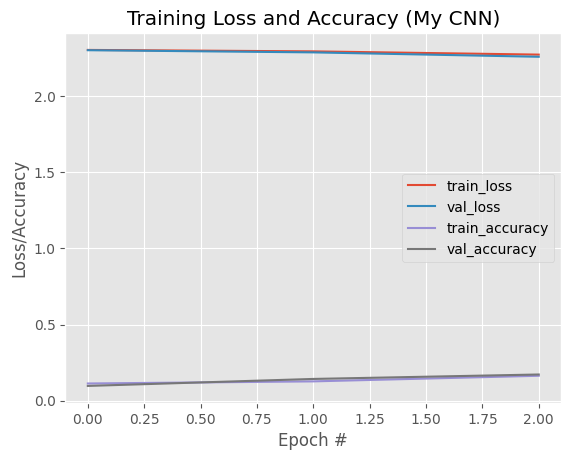

In [206]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [207]:
model_my.save('overfitting_model_my.keras')

–ù–∞—á–∞–ª—å–Ω—ã–µ –≤–µ—Å–∞, –ø–æ—Ö–æ–∂–µ, –±—ã–ª–∏ –æ—á–µ–Ω—å —Ö–æ—Ä–æ—à–∏–º–∏ –∏ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –Ω–∞–ª–∏—á–∏—è –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —ç–ø–æ—Ö –º–æ–¥–µ–ª—å –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∞—Å—å –∏–∑-–∑–∞ —á–µ–≥–æ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ —Ç–æ—á–Ω–æ—Å—Ç—å –¥–æ—Å—Ç–∏–≥–ª–∞ –ø–æ—Ä—è–¥–∫–∞ 100%, –∞ –Ω–∞ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–æ–π —Å –∫–∞–∂–¥–æ–π —ç–ø–æ—Ö–æ–π –ø–∞–¥–∞–ª–∞ (–∏ —Ä–æ—Å–ª–∏ –ø–æ—Ç–µ—Ä–∏).

–í –∫–∞—á–µ—Å—Ç–≤–µ —Ä–µ—à–µ–Ω–∏—è —ç—Ç–æ–π –ø—Ä–æ–±–ª–µ–º—ã –¥–æ–±–∞–≤–ª—é EarlyStoping, —Å–æ–±–µ—Ä—É –º–æ–¥–µ–ª—å –∏ –æ–±—É—á—É –µ–µ –∑–∞–Ω–æ–≤–æ.

In [208]:
print(Y_train.shape)

(3600, 10)


In [209]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

# –ü—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö (–∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –≤–∞—à–∏ —Ä–µ–∞–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ)
# X_train = np.random.rand(3600, 64, 64, 3)  # –ü—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
# Y_train = np.random.randint(0, 10, size=(3600, 10))  # –ü—Ä–∏–º–µ—Ä –º–µ—Ç–æ–∫ (one-hot encoded)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã X_train
print("Shape of X_train before processing:", X_train.shape)  # –û–∂–∏–¥–∞–µ–º (3600, 64, 64, 3)

# –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
X_train = X_train.astype('float32') / 255.0

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã Y_train –ø–µ—Ä–µ–¥ –æ–±—Ä–∞–±–æ—Ç–∫–æ–π
print("Shape of Y_train before processing:", Y_train.shape)  # (3600, 10)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º Y_train –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤, –≥–¥–µ –∫–∞–∂–¥—ã–π —ç–ª–µ–º–µ–Ω—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∫–ª–∞—Å—Å
Y_train = np.argmax(Y_train, axis=-1)  # –¢–µ–ø–µ—Ä—å —Ñ–æ—Ä–º–∞ (3600,)

# –£–±–µ–∂–¥–∞–µ–º—Å—è, —á—Ç–æ –∫–ª–∞—Å—Å—ã –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ –¥–∏–∞–ø–∞–∑–æ–Ω–µ [0, 9]
num_classes = 10  # –ò–∑–º–µ–Ω–∏–ª–∏ –Ω–∞ 10 –∫–ª–∞—Å—Å–æ–≤
Y_train = np.clip(Y_train, 0, num_classes - 1)  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ one-hot encoding
Y_train = to_categorical(Y_train, num_classes=num_classes)  # –¢–µ–ø–µ—Ä—å (3600, 10)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã –ø–æ—Å–ª–µ –æ–±—Ä–∞–±–æ—Ç–∫–∏
print("Shape of Y_train after processing:", Y_train.shape)  # –û–∂–∏–¥–∞–µ–º (3600, 10)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ X_train –∏ X_val –æ–±—Ä–∞—Ç–Ω–æ –≤ 4D-—Ç–µ–Ω–∑–æ—Ä (–µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ "—Ä–∞—Å–ø–ª—é—â–µ–Ω—ã")
if X_train.ndim == 2:  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–µ
    X_train = X_train.reshape(-1, 64, 64, 3)  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ (num_samples, 64, 64, 3)
    X_val = X_val.reshape(-1, 64, 64, 3)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ —Ñ–æ—Ä–º—ã –ø–æ—Å–ª–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
print("Shape of X_train after reshaping:", X_train.shape)  # –û–∂–∏–¥–∞–µ–º (2880, 64, 64, 3)
print("Shape of X_val after reshaping:", X_val.shape)  # –û–∂–∏–¥–∞–µ–º (720, 64, 64, 3)

# –ê—É–≥–º–µ–Ω—Ç–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model_my = Sequential([
    Input(shape=(64, 64, 3)),  # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –≤—Ö–æ–¥–Ω–æ–π —Ä–∞–∑–º–µ—Ä
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # –î–æ–±–∞–≤–ª–µ–Ω Dropout
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # –î–æ–±–∞–≤–ª–µ–Ω Dropout
    Conv2D(128, (3, 3), padding='same', activation='relu'),  # –î–æ–±–∞–≤–ª–µ–Ω –Ω–æ–≤—ã–π —Å–ª–æ–π
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # –£–≤–µ–ª–∏—á–µ–Ω —Ä–∞–∑–º–µ—Ä –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω–æ–≥–æ —Å–ª–æ—è
    Dense(num_classes, activation='softmax')  # –í—ã—Ö–æ–¥–Ω–æ–π —Å–ª–æ–π –¥–ª—è 10 –∫–ª–∞—Å—Å–æ–≤
])

# –ö–æ–º–ø–∏–ª—è—Ü–∏—è –º–æ–¥–µ–ª–∏ —Å —É–º–µ–Ω—å—à–µ–Ω–Ω—ã–º learning rate
model_my.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ callback-–æ–≤
early_stopping = EarlyStopping(patience=5, verbose=1)
checkpoint = ModelCheckpoint(filepath="best_model_my.keras", monitor="val_accuracy", save_best_only=True, verbose=1)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ —Å –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–µ–π –¥–∞–Ω–Ω—ã—Ö
EPOCH = 50  # –£–≤–µ–ª–∏—á–µ–Ω–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö
history = model_my.fit(
    datagen.flow(X_train, Y_train, batch_size=64),  # –û–±—É—á–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ
    validation_data=(X_val, Y_val),  # –í–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ
    epochs=EPOCH,
    callbacks=[early_stopping, checkpoint]
)

# –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–±—É—á–µ–Ω–∏—è
print("–û–±—É—á–µ–Ω–∏–µ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.")

Shape of X_train before processing: (3600, 12288)
Shape of Y_train before processing: (3600, 10)
Shape of Y_train after processing: (3600, 10)
Shape of X_train after reshaping: (2880, 64, 64, 3)
Shape of X_val after reshaping: (720, 64, 64, 3)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 75ms/step - accuracy: 0.0944 - loss: 6.7038
Epoch 1: val_accuracy improved from -inf to 0.10972, saving model to best_model_my.keras
45/45 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 100ms/step - accuracy: 0.0944 - loss: 6.6926 - val_accuracy: 0.1097 - val_loss: 5.2157
Epoch 2/50
45/45 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 76ms/step - accuracy: 0.0971 - loss: 4.8632
Epoch 2: val_accuracy did not improve from 0.10972
45/45 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 80ms/step - accuracy: 0.0970 - loss: 4.8563 - val_accuracy: 0.0861 - val_loss: 3.9567
Epoch 3/50
45/45 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 105ms/step - accuracy: 0.1091 - loss: 3.7471
Epoch 3: val_accuracy did not improve from 0.10972
45/45 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 108ms/step - accuracy: 0.1090 - loss: 3.7430 - val_accuracy:

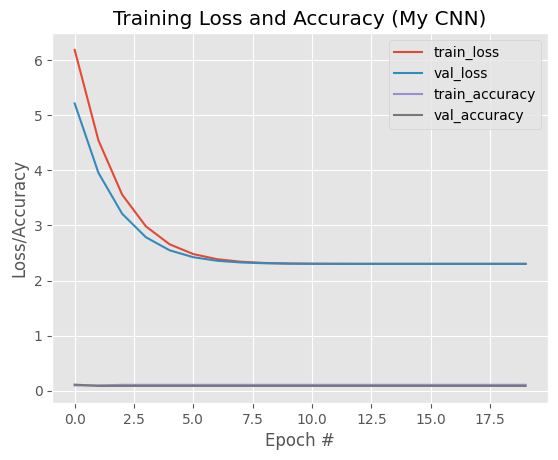

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# –°–æ–∑–¥–∞–µ–º –º–∞—Å—Å–∏–≤ N —Å –¥–ª–∏–Ω–æ–π, —Ä–∞–≤–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —ç–ø–æ—Ö
N = np.arange(0, len(history.history["loss"]))

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
plt.style.use("ggplot")
plt.figure()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –∏ –ø–æ–¥–ø–∏—Å–µ–π
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

## 2.2.   –û–∑–Ω–∞–∫–æ–º—å—Ç–µ—Å—å —Å —Å–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞–º–∏ —Å–≤–µ—Ä—Ç–æ—á–Ω—ã—Ö –Ω–µ–π—Ä–æ–Ω–Ω—ã—Ö —Å–µ—Ç–µ–π: [—Å–º. —Å—Å—ã–ª–∫—É](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). –ù–∞ –æ—Å–Ω–æ–≤–µ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä, —Ä–µ–∞–ª–∏–∑—É–π—Ç–µ (—á–∞—Å—Ç–∏—á–Ω–æ –ø–æ–≤—Ç–æ—Ä—è—è –æ—Å–Ω–æ–≤–Ω—ã–µ –ø–∞—Ç—Ç–µ—Ä–Ω—ã –ø—Ä–æ–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–∏—è) –∏ –æ–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏. –£–∫–∞–∂–∏—Ç–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É, –∫–æ—Ç–æ—Ä–æ–π –í—ã "–≤–¥–æ—Ö–Ω–æ–≤–∏–ª–∏—Å—å"

In [211]:
# –í–∞—à –∫–æ–¥

model_resnet_like = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(64, 64, 3)),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_resnet_like.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_77 (Conv2D)                   ‚îÇ (None, 64, 64, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_78 (Conv2D)                   ‚îÇ (None, 64, 64, 32)          ‚îÇ           9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_65 (MaxPooling2D)      ‚îÇ (None, 32, 32, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_79 (Conv2D)                   ‚îÇ (None, 32, 32, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_80 (Conv2D)                   ‚îÇ (None, 32, 32, 64)          ‚îÇ          36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_66 (MaxPooling2D)      ‚îÇ (None, 16, 16, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_81 (Conv2D)                   ‚îÇ (None, 16, 16, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_82 (Conv2D)                   ‚îÇ (None, 16, 16, 128)         ‚îÇ         147,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_67 (MaxPooling2D)      ‚îÇ (None, 8, 8, 128)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_26 (Flatten)                 ‚îÇ (None, 8192)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 1,337,002 (5.10 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

In [212]:
EPOCH = 20
checkpoint = ModelCheckpoint(filepath="best_model_resnet_like.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

model_resnet_like.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history_resnet_like = model_resnet_like.fit(X_train, Y_train, batch_size=50, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/20
47/47 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 80ms/step - accuracy: 0.1018 - loss: 2.3041 - val_accuracy: 0.0833 - val_loss: 2.3034
Epoch 2/20
47/47 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 22ms/step - accuracy: 0.1106 - loss: 2.3021 - val_accuracy: 0.0833 - val_loss: 2.3034
Epoch 3/20
47/47 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 19ms/step - accuracy: 0.1155 - loss: 2.3020 - val_accuracy: 0.0833 - val_loss: 2.3041
Epoch 4/20
47/47 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 17ms/step - accuracy: 0.1053 - loss: 2.3021 - val_accuracy: 0.0833 - val_loss: 2.3050
Epoch 5/20
47/47 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - accuracy: 0.1189 - loss: 2.3020 - val_accuracy: 0.0833 - val_loss: 2.3056
Epoch 6/20
47/47 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - accuracy: 0.1141 - loss: 2.3021 - val_accuracy: 0.0833 - val_loss: 2.305

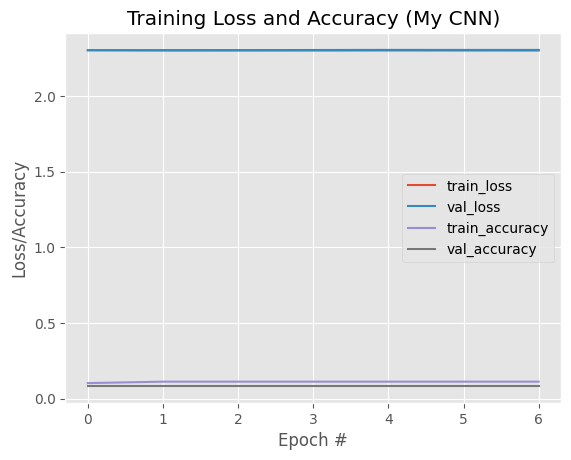

In [213]:
import numpy as np
import matplotlib.pyplot as plt

# –°–æ–∑–¥–∞–µ–º –º–∞—Å—Å–∏–≤ N —Å –¥–ª–∏–Ω–æ–π, —Ä–∞–≤–Ω–æ–π –∫–æ–ª–∏—á–µ—Å—Ç–≤—É —ç–ø–æ—Ö
N = np.arange(0, len(history_resnet_like.history["loss"]))

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ —Å—Ç–∏–ª—è –≥—Ä–∞—Ñ–∏–∫–∞
plt.style.use("ggplot")
plt.figure()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–æ–≤
plt.plot(N, history_resnet_like.history["loss"], label="train_loss")
plt.plot(N, history_resnet_like.history["val_loss"], label="val_loss")
plt.plot(N, history_resnet_like.history["accuracy"], label="train_accuracy")
plt.plot(N, history_resnet_like.history["val_accuracy"], label="val_accuracy")

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∑–∞–≥–æ–ª–æ–≤–∫–∞ –∏ –ø–æ–¥–ø–∏—Å–µ–π
plt.title("Training Loss and Accuracy (My CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

## 2.3. –°–æ—Ö—Ä–∞–Ω–∏—Ç–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏

In [214]:
# —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –æ–±—É—á–µ–Ω–∏—è —Å –ø–æ–º–æ—â—å—é —á–µ–∫–ø–æ–∏–Ω—Ç–∞

## 2.4. –ó–∞–≥—Ä—É–∑–∏—Ç–µ –æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –∏–∑ –ø—Ä–æ—à–ª–æ–π –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–æ–π —Ä–∞–±–æ—Ç—ã



## 2.5. –°—Ä–∞–≤–Ω–∏—Ç–µ –º–µ–∂–¥—É —Å–æ–±–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å –≤—Å–µ—Ö —Ç—Ä—ë—Ö –º–æ–¥–µ–ª–µ–π, –ø–æ–¥–∞–≤–∞—è –Ω–∞ –≤—Ö–æ–¥ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è (15 —Ä–∞–∑–Ω—ã—Ö –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π). –°—Ä–∞–≤–Ω–∏—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∫–∞–∂–¥–æ–π –∏–∑ –º–æ–¥–µ–ª–µ–π –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã

Model 1 Summary:


Model: "sequential_31"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_74 (Conv2D)                   ‚îÇ (None, 64, 64, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_62 (MaxPooling2D)      ‚îÇ (None, 32, 32, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_14 (Dropout)                 ‚îÇ (None, 32, 32, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_75 (Conv2D)                   ‚îÇ (None, 32, 32, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_63 (MaxPooling2D)      ‚îÇ (None, 16, 16, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_15 (Dropout)                 ‚îÇ (None, 16, 16, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_76 (Conv2D)                   ‚îÇ (None, 16, 16, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_64 (MaxPooling2D)      ‚îÇ (None, 8, 8, 128)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_25 (Flatten)                 ‚îÇ (None, 8192)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_71 (Dense)                     ‚îÇ (None, 256)                 ‚îÇ       2,097,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 6,579,680 (25.10 MB)

 Trainable params: 2,193,226 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,386,454 (16.73 MB)


Model 2 Summary:


Model: "sequential_31"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_74 (Conv2D)                   ‚îÇ (None, 64, 64, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_62 (MaxPooling2D)      ‚îÇ (None, 32, 32, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_14 (Dropout)                 ‚îÇ (None, 32, 32, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_75 (Conv2D)                   ‚îÇ (None, 32, 32, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_63 (MaxPooling2D)      ‚îÇ (None, 16, 16, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_15 (Dropout)                 ‚îÇ (None, 16, 16, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_76 (Conv2D)                   ‚îÇ (None, 16, 16, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_64 (MaxPooling2D)      ‚îÇ (None, 8, 8, 128)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_25 (Flatten)                 ‚îÇ (None, 8192)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_71 (Dense)                     ‚îÇ (None, 256)                 ‚îÇ       2,097,408 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 6,579,680 (25.10 MB)

 Trainable params: 2,193,226 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,386,454 (16.73 MB)


Model 3 Summary:


Model: "sequential_32"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_77 (Conv2D)                   ‚îÇ (None, 64, 64, 32)          ‚îÇ             896 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_78 (Conv2D)                   ‚îÇ (None, 64, 64, 32)          ‚îÇ           9,248 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_65 (MaxPooling2D)      ‚îÇ (None, 32, 32, 32)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_79 (Conv2D)                   ‚îÇ (None, 32, 32, 64)          ‚îÇ          18,496 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_80 (Conv2D)                   ‚îÇ (None, 32, 32, 64)          ‚îÇ          36,928 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_66 (MaxPooling2D)      ‚îÇ (None, 16, 16, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_81 (Conv2D)                   ‚îÇ (None, 16, 16, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_82 (Conv2D)                   ‚îÇ (None, 16, 16, 128)         ‚îÇ         147,584 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_67 (MaxPooling2D)      ‚îÇ (None, 8, 8, 128)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_26 (Flatten)                 ‚îÇ (None, 8192)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 4,011,008 (15.30 MB)

 Trainable params: 1,337,002 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,674,006 (10.20 MB)

Processing image: e83db70e2cf0073ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.png
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 303ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 299ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 349ms/step


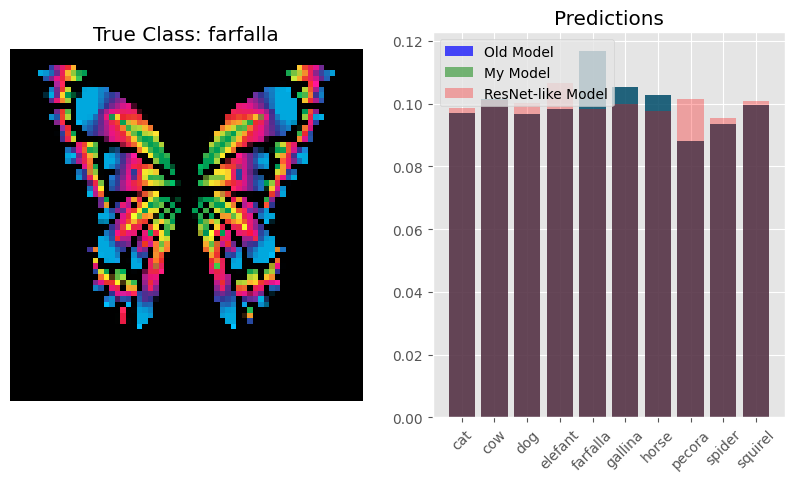

Class	Old_model	My_model	ResNet_like
cat	0.09715		0.09715		0.09876
cow	0.10143		0.10143		0.10103
dog	0.09665		0.09665		0.10007
elefant	0.09836		0.09836		0.10664
farfalla	0.11687		0.11687		0.09827
gallina	0.10546		0.10546		0.10000
horse	0.10262		0.10262		0.09770
pecora	0.08816		0.08816		0.10145
spider	0.09365		0.09365		0.09534
squirel	0.09966		0.09966		0.10073
Result:	farfalla		farfalla		elefant

Processing image: OIP-_zJyP5n6EgST1ooshBckeQHaE8.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step


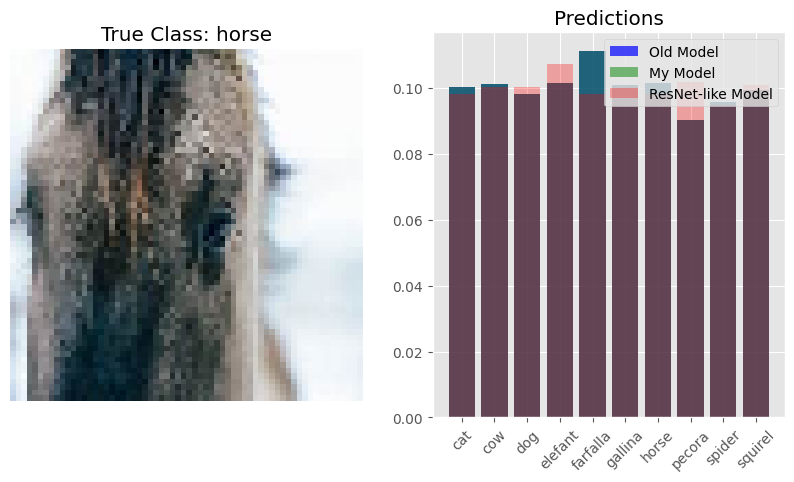

Class	Old_model	My_model	ResNet_like
cat	0.10020		0.10020		0.09821
cow	0.10126		0.10126		0.10034
dog	0.09821		0.09821		0.10021
elefant	0.10144		0.10144		0.10734
farfalla	0.11123		0.11123		0.09800
gallina	0.10097		0.10097		0.10013
horse	0.10159		0.10159		0.09810
pecora	0.09021		0.09021		0.10182
spider	0.09558		0.09558		0.09488
squirel	0.09932		0.09932		0.10097
Result:	farfalla		farfalla		elefant

Processing image: e837b20b28f7013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 28ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step


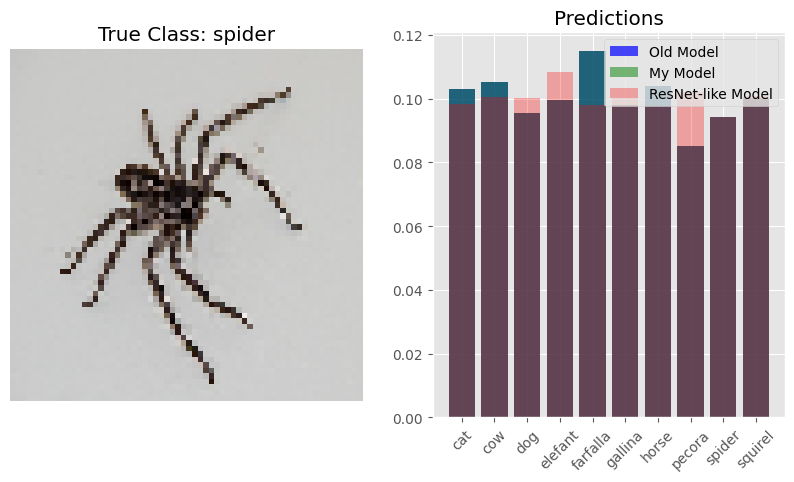

Class	Old_model	My_model	ResNet_like
cat	0.10293		0.10293		0.09819
cow	0.10525		0.10525		0.10038
dog	0.09559		0.09559		0.10013
elefant	0.09969		0.09969		0.10837
farfalla	0.11500		0.11500		0.09815
gallina	0.09804		0.09804		0.10014
horse	0.10395		0.10395		0.09772
pecora	0.08517		0.08517		0.10202
spider	0.09429		0.09429		0.09411
squirel	0.10009		0.10009		0.10080
Result:	farfalla		farfalla		elefant

Processing image: e834b20f2df4053ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb3b9_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step


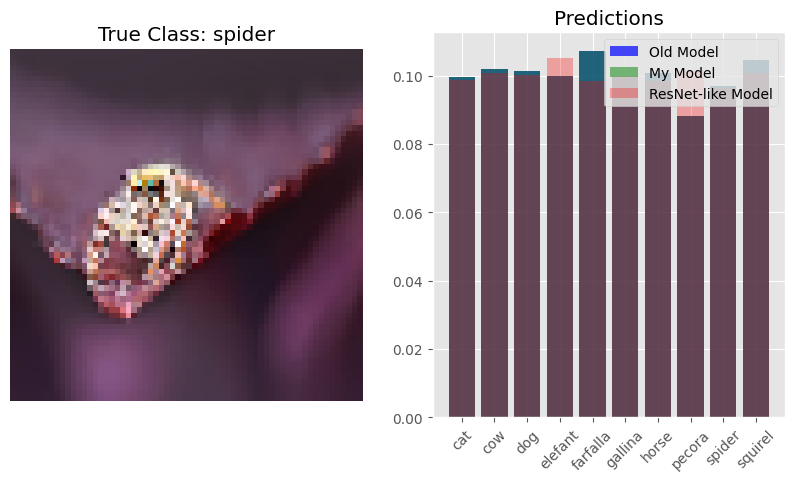

Class	Old_model	My_model	ResNet_like
cat	0.09965		0.09965		0.09874
cow	0.10193		0.10193		0.10088
dog	0.10142		0.10142		0.10026
elefant	0.09977		0.09977		0.10506
farfalla	0.10725		0.10725		0.09848
gallina	0.09949		0.09949		0.10000
horse	0.10080		0.10080		0.09828
pecora	0.08820		0.08820		0.10132
spider	0.09697		0.09697		0.09624
squirel	0.10452		0.10452		0.10076
Result:	farfalla		farfalla		elefant

Processing image: ea31b00821f71c22d2524518b7444f92e37fe5d404b0144390f8c770a1edb6_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 30ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step


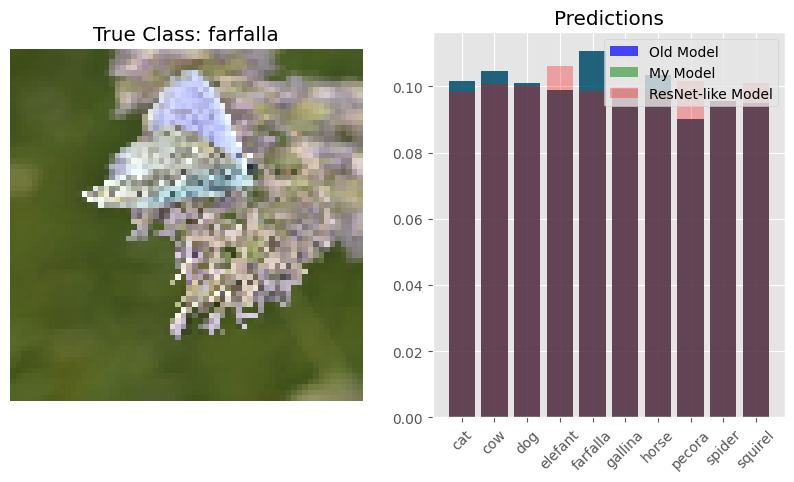

Class	Old_model	My_model	ResNet_like
cat	0.10162		0.10162		0.09836
cow	0.10449		0.10449		0.10077
dog	0.10093		0.10093		0.10019
elefant	0.09882		0.09882		0.10598
farfalla	0.11072		0.11072		0.09844
gallina	0.09924		0.09924		0.09988
horse	0.10351		0.10351		0.09820
pecora	0.09022		0.09022		0.10156
spider	0.09560		0.09560		0.09570
squirel	0.09487		0.09487		0.10092
Result:	farfalla		farfalla		elefant

Processing image: OIP-_K54-wf92Z07DTOdrqGnBQHaFj.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 44ms/step


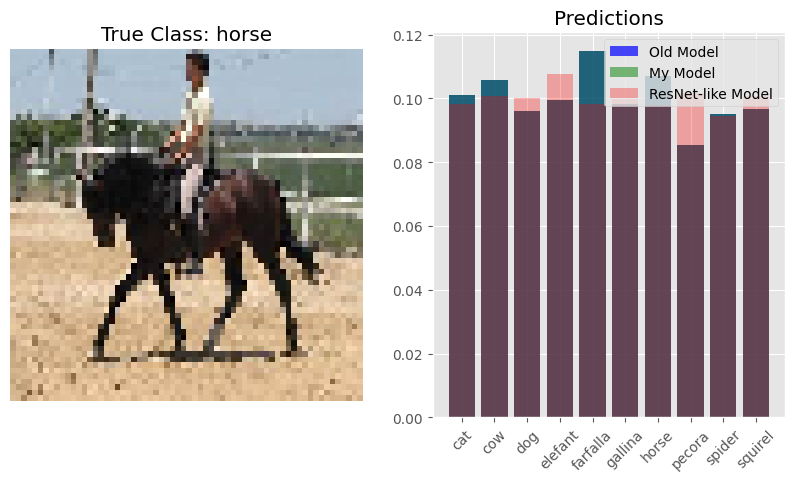

Class	Old_model	My_model	ResNet_like
cat	0.10105		0.10105		0.09818
cow	0.10578		0.10578		0.10068
dog	0.09600		0.09600		0.10019
elefant	0.09956		0.09956		0.10759
farfalla	0.11495		0.11495		0.09832
gallina	0.09828		0.09828		0.09996
horse	0.10698		0.10698		0.09788
pecora	0.08555		0.08555		0.10181
spider	0.09515		0.09515		0.09457
squirel	0.09671		0.09671		0.10082
Result:	farfalla		farfalla		elefant

Processing image: e83cb10620f2073ed1584d05fb1d4e9fe777ead218ac104497f5c978a4eebdbd_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step


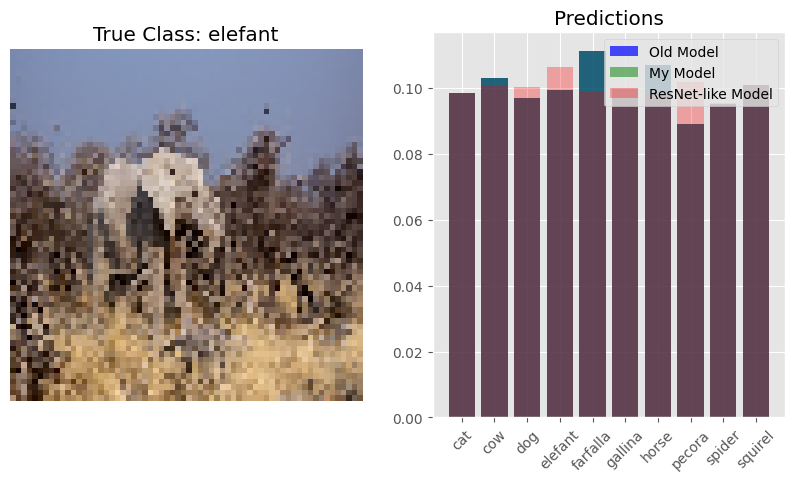

Class	Old_model	My_model	ResNet_like
cat	0.09830		0.09830		0.09837
cow	0.10282		0.10282		0.10064
dog	0.09690		0.09690		0.10021
elefant	0.09929		0.09929		0.10617
farfalla	0.11119		0.11119		0.09856
gallina	0.09969		0.09969		0.09985
horse	0.10702		0.10702		0.09821
pecora	0.08913		0.08913		0.10164
spider	0.09497		0.09497		0.09550
squirel	0.10069		0.10069		0.10086
Result:	farfalla		farfalla		elefant

Processing image: OIP-_2Il44HQzZrQQwqKl7oUOwHaFj.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 32ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step


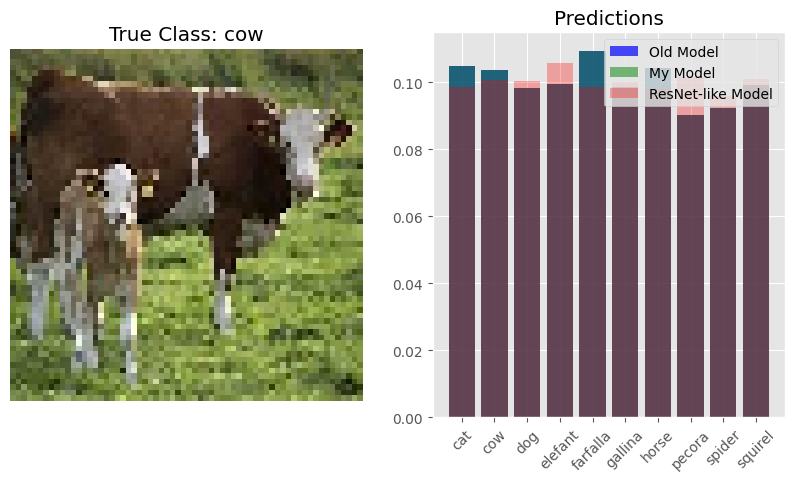

Class	Old_model	My_model	ResNet_like
cat	0.10477		0.10477		0.09853
cow	0.10372		0.10372		0.10073
dog	0.09816		0.09816		0.10022
elefant	0.09946		0.09946		0.10560
farfalla	0.10937		0.10937		0.09845
gallina	0.09870		0.09870		0.10006
horse	0.10423		0.10423		0.09816
pecora	0.09027		0.09027		0.10144
spider	0.09217		0.09217		0.09595
squirel	0.09916		0.09916		0.10087
Result:	farfalla		farfalla		elefant

Processing image: OIP-0T8A92vWXyIYCcmBW8BnmgHaEH.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step


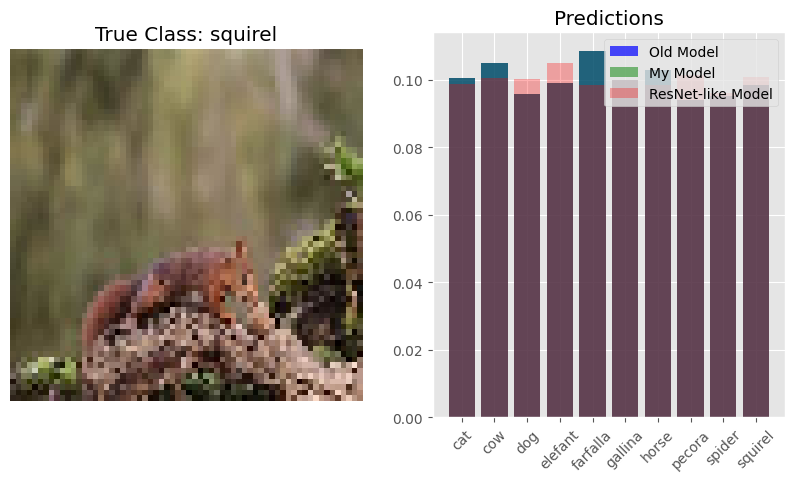

Class	Old_model	My_model	ResNet_like
cat	0.10058		0.10058		0.09870
cow	0.10505		0.10505		0.10070
dog	0.09583		0.09583		0.10016
elefant	0.09923		0.09923		0.10511
farfalla	0.10863		0.10863		0.09850
gallina	0.10000		0.10000		0.09991
horse	0.10299		0.10299		0.09853
pecora	0.09391		0.09391		0.10148
spider	0.09531		0.09531		0.09616
squirel	0.09847		0.09847		0.10074
Result:	farfalla		farfalla		elefant

Processing image: ea34b20a2ef5013ed1584d05fb1d4e9fe777ead218ac104497f5c97faeebb5bb_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 59ms/step


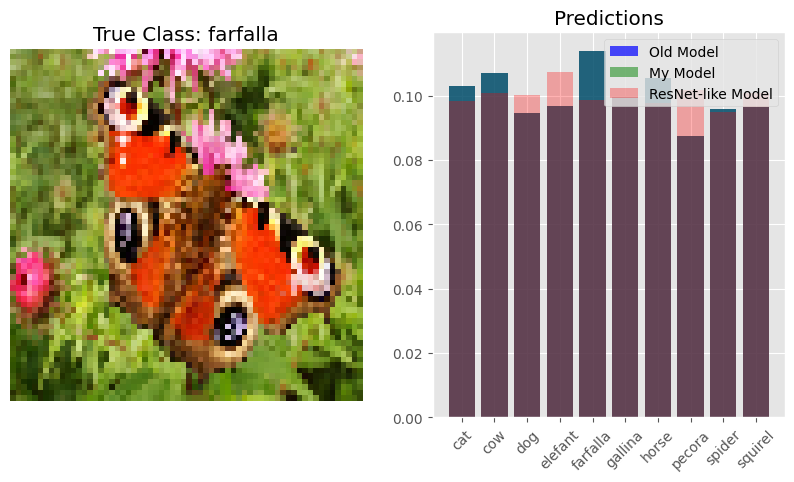

Class	Old_model	My_model	ResNet_like
cat	0.10309		0.10309		0.09836
cow	0.10687		0.10687		0.10079
dog	0.09447		0.09447		0.10010
elefant	0.09690		0.09690		0.10722
farfalla	0.11393		0.11393		0.09870
gallina	0.09958		0.09958		0.09952
horse	0.10544		0.10544		0.09773
pecora	0.08744		0.08744		0.10174
spider	0.09577		0.09577		0.09497
squirel	0.09651		0.09651		0.10087
Result:	farfalla		farfalla		elefant

Processing image: 53.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step


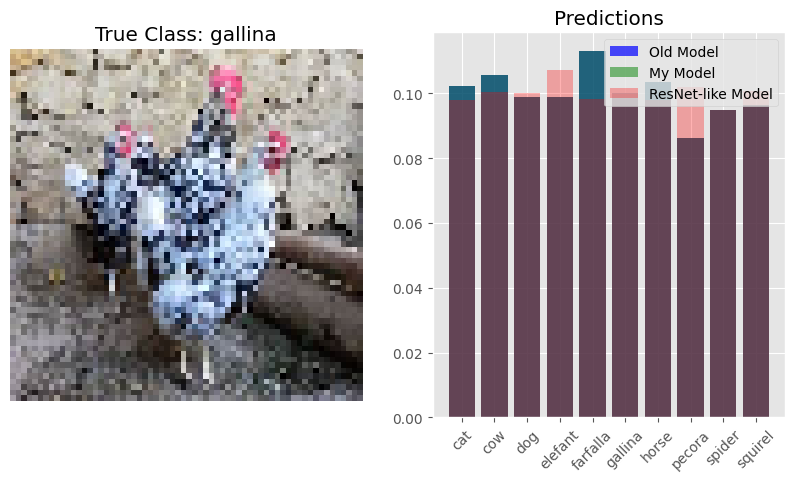

Class	Old_model	My_model	ResNet_like
cat	0.10228		0.10228		0.09809
cow	0.10579		0.10579		0.10057
dog	0.09880		0.09880		0.10016
elefant	0.09882		0.09882		0.10738
farfalla	0.11317		0.11317		0.09841
gallina	0.10028		0.10028		0.09992
horse	0.10339		0.10339		0.09789
pecora	0.08625		0.08625		0.10185
spider	0.09479		0.09479		0.09485
squirel	0.09642		0.09642		0.10089
Result:	farfalla		farfalla		elefant

Processing image: e832b40a20f61c22d2524518b7444f92e37fe5d404b0144390f8c47ba6edbc_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 38ms/step


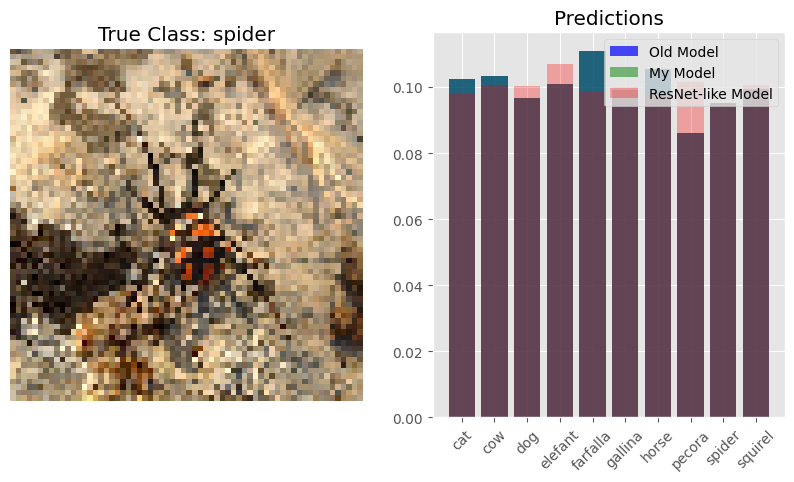

Class	Old_model	My_model	ResNet_like
cat	0.10238		0.10238		0.09835
cow	0.10345		0.10345		0.10063
dog	0.09678		0.09678		0.10020
elefant	0.10086		0.10086		0.10686
farfalla	0.11099		0.11099		0.09860
gallina	0.09922		0.09922		0.10000
horse	0.10540		0.10540		0.09790
pecora	0.08612		0.08612		0.10164
spider	0.09525		0.09525		0.09509
squirel	0.09955		0.09955		0.10072
Result:	farfalla		farfalla		elefant

Processing image: ea33b50c2afd1c22d2524518b7444f92e37fe5d404b0144390f8c770a2e9b5_640.jpg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step


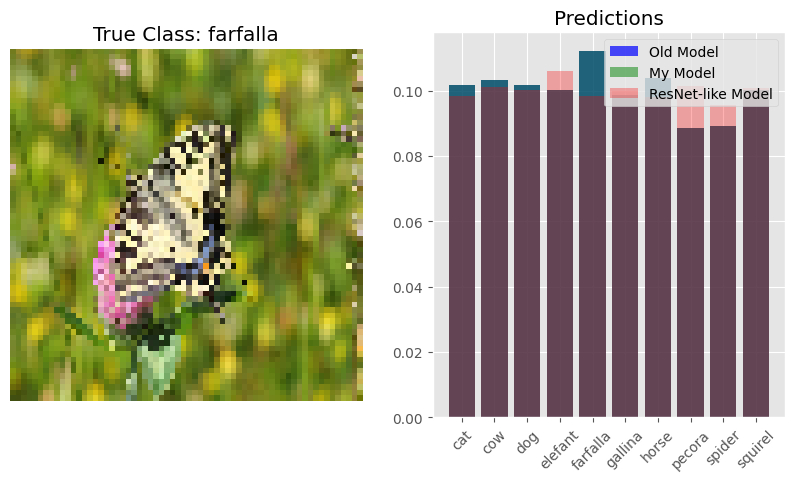

Class	Old_model	My_model	ResNet_like
cat	0.10162		0.10162		0.09853
cow	0.10332		0.10332		0.10100
dog	0.10179		0.10179		0.10021
elefant	0.10017		0.10017		0.10605
farfalla	0.11221		0.11221		0.09834
gallina	0.09883		0.09883		0.09990
horse	0.10389		0.10389		0.09797
pecora	0.08869		0.08869		0.10153
spider	0.08927		0.08927		0.09573
squirel	0.10022		0.10022		0.10075
Result:	farfalla		farfalla		elefant

Processing image: OIP-_MCd8TBNEv9o4vwFWCYbiwHaFK.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 37ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step


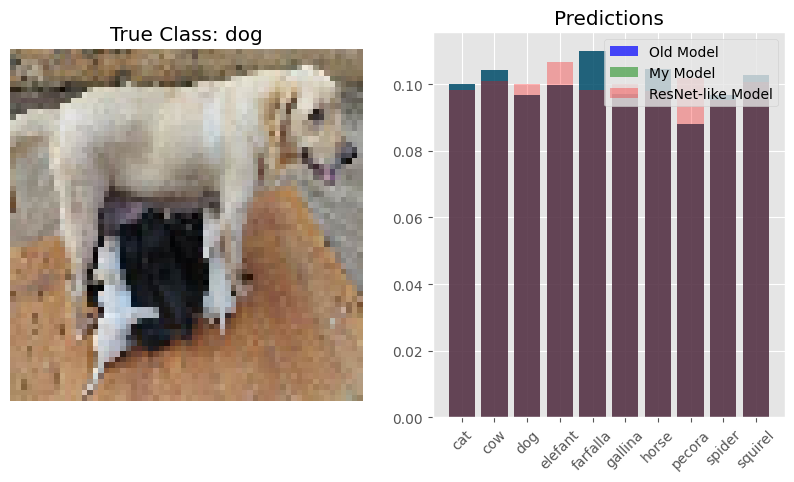

Class	Old_model	My_model	ResNet_like
cat	0.10017		0.10017		0.09822
cow	0.10419		0.10419		0.10084
dog	0.09677		0.09677		0.10016
elefant	0.09984		0.09984		0.10664
farfalla	0.11001		0.11001		0.09838
gallina	0.09694		0.09694		0.10007
horse	0.10464		0.10464		0.09799
pecora	0.08790		0.08790		0.10173
spider	0.09675		0.09675		0.09517
squirel	0.10279		0.10279		0.10079
Result:	farfalla		farfalla		elefant

Processing image: OIP-_yOgn7ZlG5BlAKGYGdo26gAAAA.jpeg
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 36ms/step


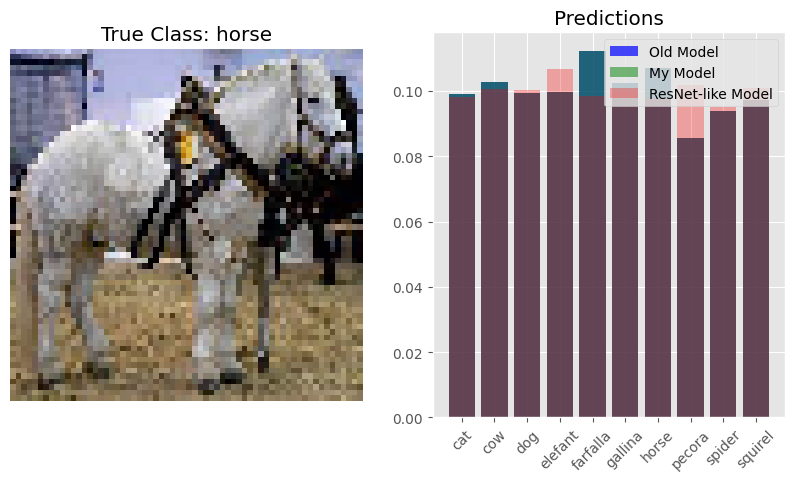

Class	Old_model	My_model	ResNet_like
cat	0.09921		0.09921		0.09825
cow	0.10285		0.10285		0.10065
dog	0.09952		0.09952		0.10026
elefant	0.09971		0.09971		0.10683
farfalla	0.11233		0.11233		0.09843
gallina	0.10239		0.10239		0.09995
horse	0.10694		0.10694		0.09795
pecora	0.08576		0.08576		0.10178
spider	0.09400		0.09400		0.09500
squirel	0.09730		0.09730		0.10089
Result:	farfalla		farfalla		elefant


Final Accuracy:
Old Model Accuracy: 26.67%
My Model Accuracy: 26.67%
ResNet-like Model Accuracy: 6.67%


In [215]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from imutils import paths
import random
import os

# –ó–∞–≥—Ä—É–∑–∫–∞ –º–æ–¥–µ–ª–µ–π
model_1 = load_model('/content/best_model_my.keras')  # –ú–æ–¥–µ–ª—å 1
model_2 = load_model('/content/best_model_my.keras')  # –ú–æ–¥–µ–ª—å 2
model_3 = load_model('/content/best_model_resnet_like.keras')  # –ú–æ–¥–µ–ª—å 3

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—ã –º–æ–¥–µ–ª–µ–π
print("Model 1 Summary:")
model_1.summary()

print("\nModel 2 Summary:")
model_2.summary()

print("\nModel 3 Summary:")
model_3.summary()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–≥—Ä—É–∑–∫–∏ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
def load_and_prepare_image(image_path, target_size=(64, 64)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0  # –ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
    return img_array

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
def predict_image(img_array, model):
    img_input = img_array.reshape((1, 64, 64, 3))
    preds = model.predict(img_input)[0]
    return preds

# –ü—É—Ç—å –∫ –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–∏ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
imagesPath = sorted(list(paths.list_images('/content/drive/MyDrive/animals/')))
random.shuffle(imagesPath)  # –ü–µ—Ä–µ–º–µ—à–∏–≤–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

# –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ —Å–æ–∑–¥–∞–Ω–∏–µ —Å–ø–∏—Å–∫–∞ –∫–ª–∞—Å—Å–æ–≤ –∏–∑ —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∏—Ä–µ–∫—Ç–æ—Ä–∏–π
class_labels = sorted(os.listdir('/content/drive/MyDrive/animals/'))

# –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º—Å—è 15 –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
images_to_test = imagesPath[:15]

# –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π
results = {
    'model_1_correct': 0,
    'model_2_correct': 0,
    'model_3_correct': 0,
}

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π
for img_path in images_to_test:
    print(f"Processing image: {os.path.basename(img_path)}")
    img_array = load_and_prepare_image(img_path)

    # –ü–æ–ª—É—á–∞–µ–º –∏—Å—Ç–∏–Ω–Ω—ã–π –∫–ª–∞—Å—Å –∏–∑ –ø—É—Ç–∏
    true_class = os.path.basename(os.path.dirname(img_path))  # –ù–∞–ø—Ä–∏–º–µ—Ä, 'cat', 'dog' –∏ —Ç.–¥.

    # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è —Å –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–º–∏ –∫–ª–∞—Å—Å–∞–º–∏
    if true_class not in class_labels:
        print(f"Skipping image {os.path.basename(img_path)}: unknown class '{true_class}'")
        continue

    true_class_idx = class_labels.index(true_class)  # –ò–Ω–¥–µ–∫—Å –∏—Å—Ç–∏–Ω–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞

    # –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –º–æ–¥–µ–ª–µ–π
    preds_1 = predict_image(img_array, model_1)
    preds_2 = predict_image(img_array, model_2)
    preds_3 = predict_image(img_array, model_3)

    # –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å –∏—Å—Ç–∏–Ω–Ω—ã–º –∫–ª–∞—Å—Å–æ–º
    if np.argmax(preds_1) == true_class_idx:
        results['model_1_correct'] += 1
    if np.argmax(preds_2) == true_class_idx:
        results['model_2_correct'] += 1
    if np.argmax(preds_3) == true_class_idx:
        results['model_3_correct'] += 1

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"True Class: {true_class}")

    plt.subplot(1, 2, 2)
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º —Ç–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ 4 –∫–ª–∞—Å—Å–∞ –¥–ª—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã
    plt.bar(class_labels[:10], preds_1, color='blue', alpha=0.7, label='Old Model')
    plt.bar(class_labels[:10], preds_2, color='green', alpha=0.5, label='My Model')
    plt.bar(class_labels[:10], preds_3, color='red', alpha=0.3, label='ResNet-like Model')
    plt.xticks(rotation=45)
    plt.title("Predictions")
    plt.legend()
    plt.show()

    # –í—ã–≤–æ–¥ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
    print('Class\tOld_model\tMy_model\tResNet_like')
    for i in range(len(preds_1)):
        print(f'{class_labels[i]}\t{preds_1[i]:.5f}\t\t{preds_2[i]:.5f}\t\t{preds_3[i]:.5f}')
    print(f'Result:\t{class_labels[np.argmax(preds_1)]}\t\t{class_labels[np.argmax(preds_2)]}\t\t{class_labels[np.argmax(preds_3)]}\n')

# –í—ã–≤–æ–¥ –∏—Ç–æ–≥–æ–≤–æ–π —Ç–æ—á–Ω–æ—Å—Ç–∏
total_images = len(images_to_test)
print("\nFinal Accuracy:")
print(f"Old Model Accuracy: {results['model_1_correct'] / total_images * 100:.2f}%")
print(f"My Model Accuracy: {results['model_2_correct'] / total_images * 100:.2f}%")
print(f"ResNet-like Model Accuracy: {results['model_3_correct'] / total_images * 100:.2f}%")

# –ó–∞–¥–∞–Ω–∏–µ ‚Ññ3*. –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –≥–ª—É–±–æ–∫–æ–π —Å–≤–µ—Ä—Ç–æ—á–Ω–æ–π –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–∏—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è

## 3.1. –†–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

–ë—É–¥–µ–º —Ä–∞–±–æ—Ç–∞—Ç—å —Å –Ω–∞–±–æ—Ä–æ–º –¥–∞–Ω–Ω—ã–º `fetch_olivetti_faces` –∏–∑ `sklearn`.

### 3.1.1. –ü–µ—Ä–µ–≤–µ–¥–∏—Ç–µ –≤–µ–∫—Ç–æ—Ä—ã –≤ –Ω–∞—Å—Ç–æ—è—â–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –∏–∑ –¥–≤—É—Ö —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–µ–π

In [216]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [217]:
train.shape

(320, 4096)

–°–µ–π—á–∞—Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ - —ç—Ç–æ –≤–µ–∫—Ç–æ—Ä, –∏–º–µ—é—â–∏–π —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å 4096.

In [218]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å

train = train.reshape((train.shape[0], 64, 64))
test = test.reshape((test.shape[0], 64, 64))

test.shape

(80, 64, 64)

### 3.1.2. –û—Ç—Ä–∏—Å—É–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–º–µ—Ä–æ–≤

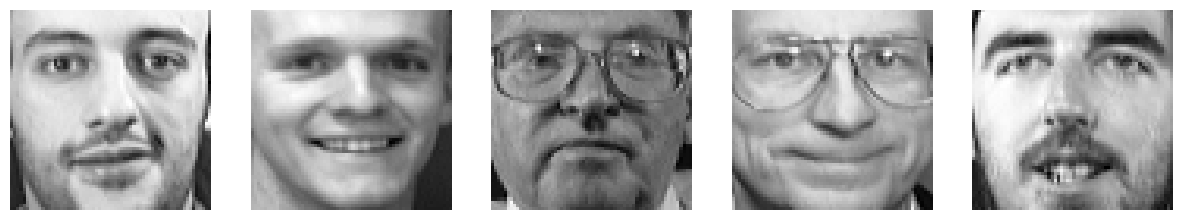

In [219]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

–ü–æ–¥–µ–ª–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ X –∏ y, –≥–¥–µ X - —ç—Ç–æ –≤–µ—Ä—Ö–Ω—è—è —á–∞—Å—Ç—å –ª–∏—Ü–∞ —á–µ–ª–æ–≤–µ–∫–∞, –Ω–∞ —ç—Ç–æ–º –º–æ–¥–µ–ª—å –±—É–¥–µ—Ç –æ–±—É—á–∞—Ç—å—Å—è, –∞ y - —ç—Ç–æ –Ω–∏–∂–Ω—è—è —á–∞—Å—Ç—å –ª–∏—Ü–∞ —á–µ–ª–æ–≤–µ–∫–∞ - –µ—ë –±—É–¥–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å.

In [220]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [221]:
X_train.shape

(320, 32, 64)

–í–æ—Ç –æ–¥–∏–Ω –ø—Ä–∏–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –ø–∞—Ä—ã.

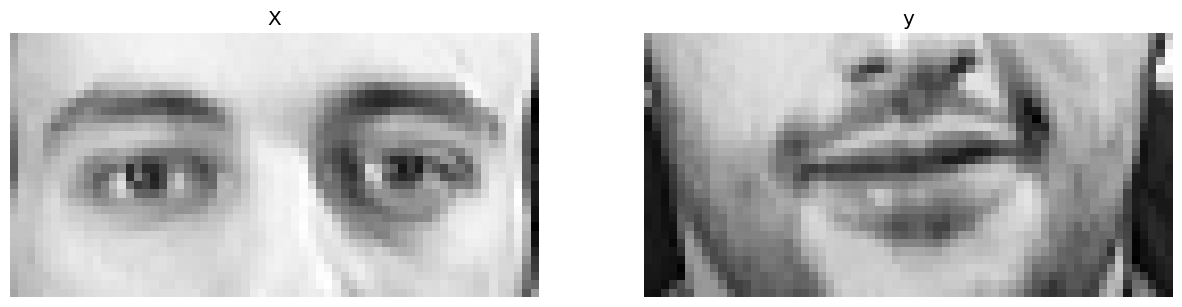

In [222]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. –ò–∑–º–µ–Ω–∏—Ç–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å y
–û—Å—Ç–∞–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ –∏–∑–º–µ–Ω–∏—Ç—å —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å y, —Ç.–∫. —Å–µ–π—á–∞—Å $y$ - –∫–∞—Ä—Ç–∏–Ω–∫–∞ 32x64, –∞ –≤—ã—Ö–æ–¥ –Ω–µ–π—Ä–æ–Ω–Ω–æ–π —Å–µ—Ç–∏ —É –Ω–∞—Å –±—É–¥–µ—Ç –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –∏ —Ä–∞–≤–Ω—ã–π 32 * 64 = 2048.

In [223]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. –°–æ–∑–¥–∞–π—Ç–µ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä—É –¥–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏

In [224]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
model_rec = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 64, 1)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),

    Dense(2048, activation='sigmoid'),
])

model_rec.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_83 (Conv2D)                   ‚îÇ (None, 32, 64, 64)          ‚îÇ             640 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_68 (MaxPooling2D)      ‚îÇ (None, 16, 32, 64)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_84 (Conv2D)                   ‚îÇ (None, 16, 32, 128)         ‚îÇ          73,856 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_69 (MaxPooling2D)      ‚îÇ (None, 8, 16, 128)          ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_85 (Conv2D)                   ‚îÇ (None, 8, 16, 256)          ‚îÇ         295,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_70 (MaxPooling2D)      ‚îÇ (None, 4, 8, 256)           ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_27 (Flatten)                 ‚îÇ (None, 8192)                ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_75 (Dense)                     ‚îÇ (None, 512)                 ‚îÇ       4,194,816 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_76 (Dense)                     ‚îÇ (None, 1024)                ‚îÇ         525,312 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_77 (Dense)                     ‚îÇ (None, 2048)                ‚îÇ       2,099,200 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

 Total params: 7,188,992 (27.42 MB)

 Trainable params: 7,188,992 (27.42 MB)

 Non-trainable params: 0 (0.00 B)

## 3.3. –°–∫–æ–º–ø–∏–ª–∏—Ä—É–π—Ç–µ —Å–µ—Ç—å

–ü–æ–¥–±–µ—Ä–∏—Ç–µ –Ω—É–∂–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å –∏ –º–µ—Ç—Ä–∏–∫—É. –û–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å 'adam'

In [225]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
model_rec.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

## 3.4. –û–±—É—á–∏—Ç–µ –Ω–µ–π—Ä–æ—Å–µ—Ç—å

–í—ã–±–µ—Ä–∏—Ç–µ –Ω—É–∂–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ø–æ—Ö.


In [226]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
EPOCH = 100

checkpoint = ModelCheckpoint(filepath="best_model_rec.keras", monitor="val_accuracy", save_best_only=True, verbose=0)

history_rec = model_rec.fit(X_train, y_train_n, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[early_stopping, checkpoint])

Epoch 1/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 191ms/step - accuracy: 8.6806e-04 - loss: 0.0253 - val_accuracy: 0.0000e+00 - val_loss: 0.0228
Epoch 2/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0216 - val_accuracy: 0.0000e+00 - val_loss: 0.0216
Epoch 3/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0208 - val_accuracy: 0.0000e+00 - val_loss: 0.0217
Epoch 4/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 96ms/step - accuracy: 8.6806e-04 - loss: 0.0209 - val_accuracy: 0.0156 - val_loss: 0.0214
Epoch 5/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step - accuracy: 0.0184 - loss: 0.0203 - val_accuracy: 0.0156 - val_loss: 0.0213
Epoch 6/100
8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 18ms/step - accuracy: 0.0163 - loss: 0.0204 - val_accuracy: 0

## 3.5. –°–¥–µ–ª–∞–π—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [227]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
preds = model_rec.predict(X_test, batch_size=10)

8/8 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step  


## 3.6. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –º–µ—Ç—Ä–∏–∫—É –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [228]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å

from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test_n)

0.008892272599041462

## 3.7. –ü—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –≤–µ–∫—Ç–æ—Ä—ã –≤ –¥–≤—É–º–µ—Ä–Ω–æ–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ (–ø–æ–º–µ–Ω—è–π—Ç–µ –∏—Ö —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å)

In [229]:
preds.shape

(80, 2048)

In [230]:
# –í–∞—à –∫–æ–¥ –∑–¥–µ—Å—å
pred_test = preds.reshape(preds.shape[0], 32, 64)

–û—Ç—Ä–∏—Å—É–π—Ç–µ –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è.

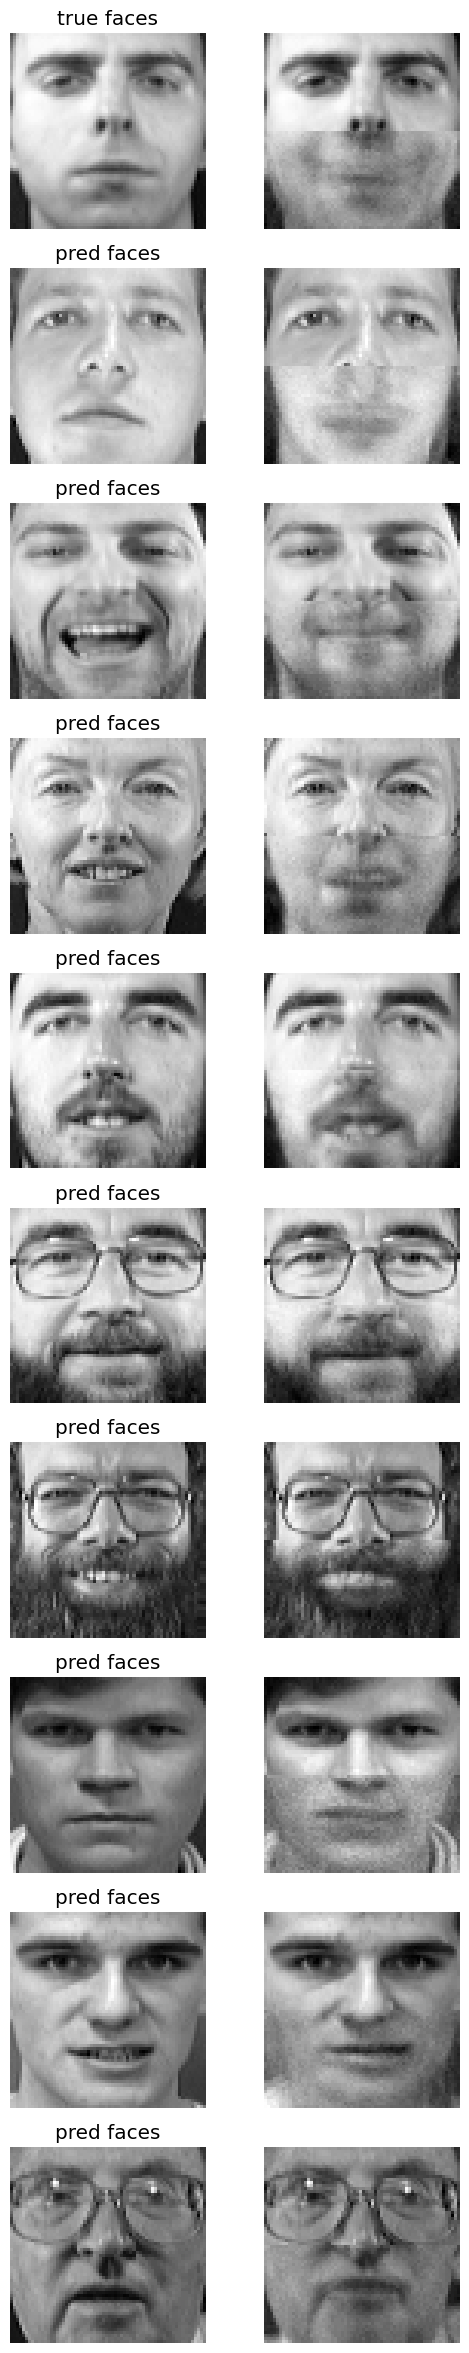

In [231]:
# –ü—Ä–∏–º–µ—Ä –∫–æ–¥–∞:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title='pred faces')
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )